<a href="https://colab.research.google.com/github/AprajitaChhawi/A-case-study-on-credit-default/blob/main/maxlife_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel (r'case_study_data.xlsx')
df

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,6,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,3,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,5,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,6,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,6,A124,80,A143,A153,3,A173,3,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,18,A32,A42,2604,A61,A74,5,A92,A101,6,A121,47,A143,A152,2,A172,2,A191,A201,1
996,A11,45,A32,A41,5786,A61,A73,6,A91,A101,6,A122,60,A143,A152,2,A174,2,A192,A201,1
997,A14,18,A32,A43,1206,A61,A75,6,A93,A101,6,A123,57,A143,A152,2,A173,2,A191,A201,1
998,A11,68,A32,A43,2768,A61,A73,6,A93,A101,6,A124,35,A143,A153,2,A173,2,A192,A201,2


In [3]:
def preprocess_data():
    credit_df_one_hot = df.copy() #SAVE A COPY FOR LATER 
    for column in df.select_dtypes(include='object').columns: # Remove 'A' from categorical columns
        df[column] = df[column].str.replace('A','')
        credit_df_one_hot.drop([column], axis=1, inplace=True)
    # THERE ARE MANY CATEGORICAL COLUMNS    
    # One hot encode Categorical columns
    credit_df_one_hot = pd.concat([pd.get_dummies(df.select_dtypes(include='object'), drop_first=True), credit_df_one_hot], axis=1) 
    return df, credit_df_one_hot

In [4]:
from sklearn.preprocessing import LabelEncoder 
df, dummy_df = preprocess_data()
encode = LabelEncoder() #Encode target labels with value between 0 and n_classes-1
encoded = encode.fit_transform(df['status']) #Fit label encoder and return encoded labels
df['status'] = encoded
dummy_df['status'] = encoded

In [5]:
import matplotlib.pyplot as plt
def visualize_distribution(attr):
    good_risk_df = df[df["status"]==0]
    bad_risk_df = df[df["status"]==1]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'status']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'status']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['status'].index.tolist(), attr_good_risk_df['status'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['status'].index.tolist(), attr_bad_risk_df['status'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["present_emp_since","num_credits","inst_rate","dependents"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['status'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['status'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['status'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['status'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

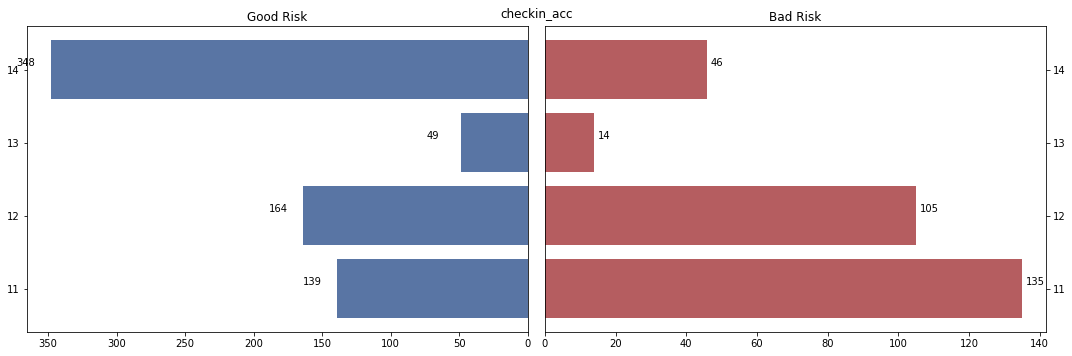

In [6]:
visualize_distribution("checkin_acc")

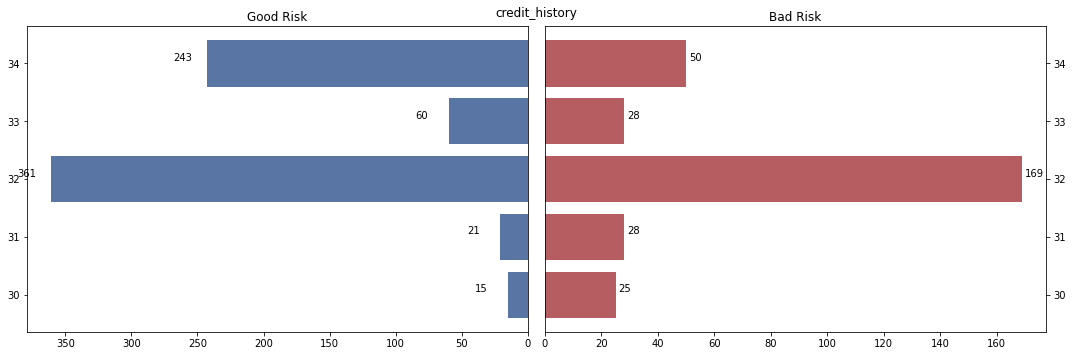

In [7]:
visualize_distribution("credit_history")

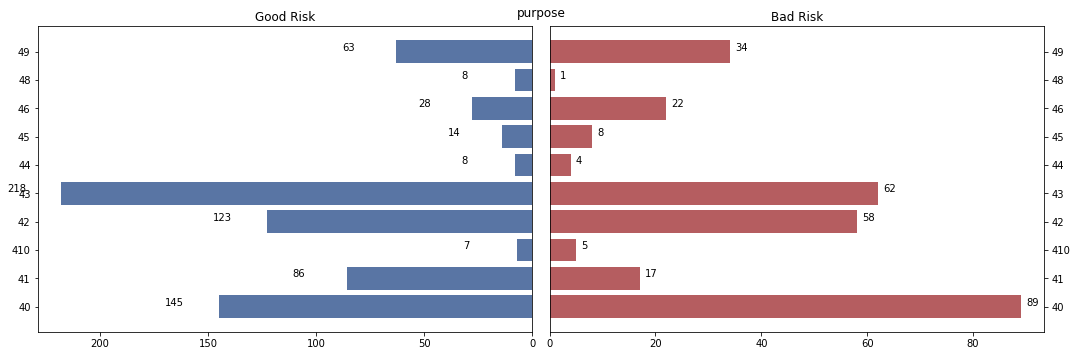

In [8]:
visualize_distribution("purpose")

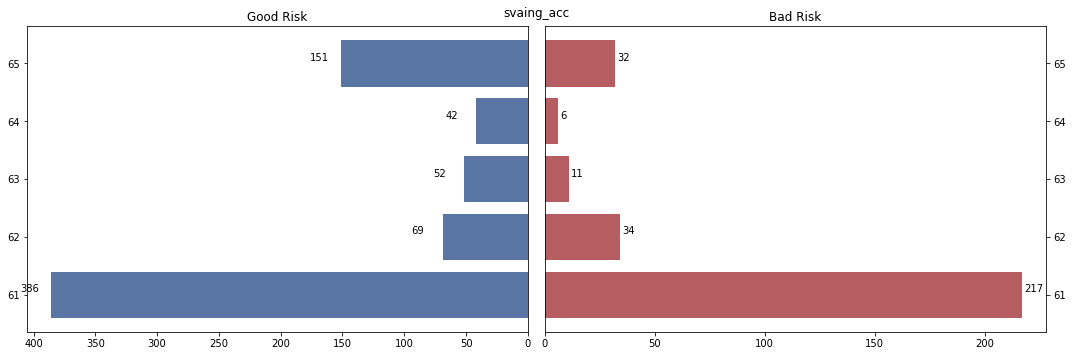

In [9]:
visualize_distribution("svaing_acc")

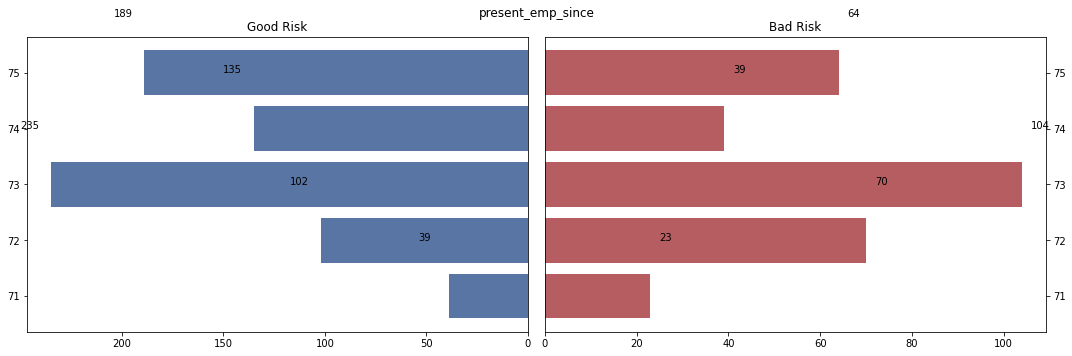

In [10]:
visualize_distribution("present_emp_since")

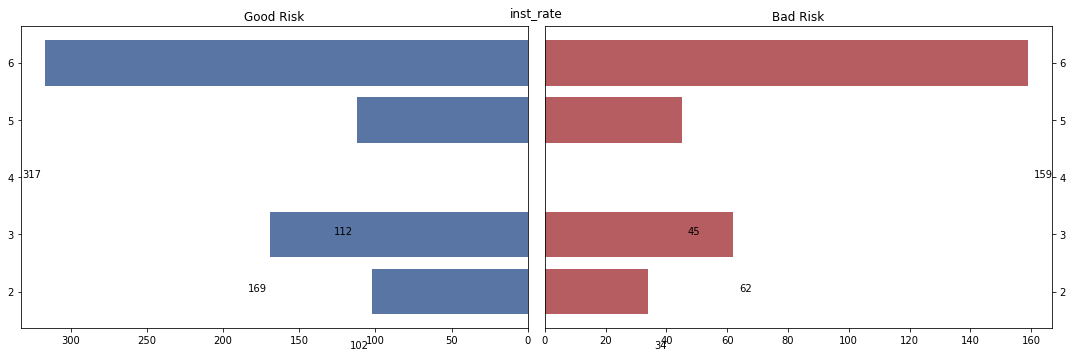

In [11]:
visualize_distribution("inst_rate")

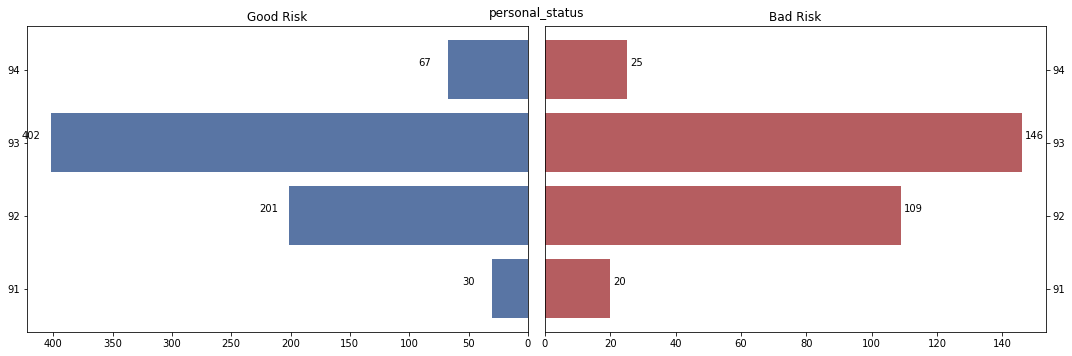

In [12]:
visualize_distribution("personal_status")

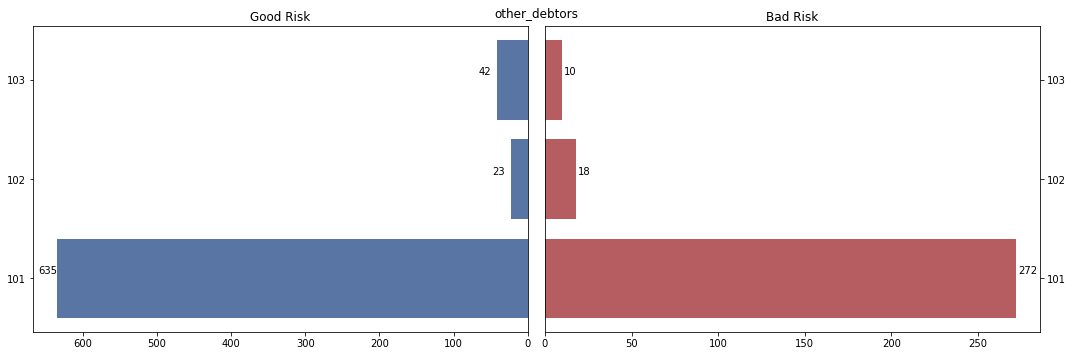

In [13]:
visualize_distribution("other_debtors")

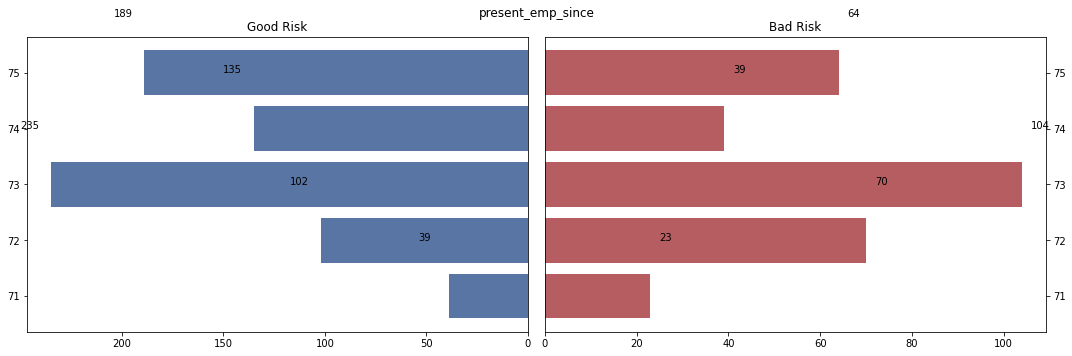

In [14]:
visualize_distribution("present_emp_since")